In [1]:
import numpy as np
from scipy import signal,stats
import pykalman as pk
from matplotlib import pyplot as plt
import pandas as pd

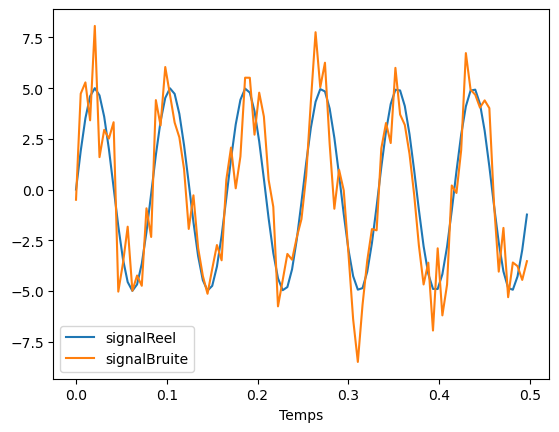

In [2]:
df = pd.read_excel("./2223G3-SDIA-donnees.xlsx",index_col="Temps")[["signalReel","signalBruite"]]
df.loc[:0.5].plot()

z= df.signalBruite.to_numpy()
N=len(z)

In [3]:
Q = np.array([[2e-5,0],[0,2e-1]])

R = 3

A = np.eye(2)

phi = 0
f_0 = 12
f_e = 123.28
Te = 1/123.28
a = 5

h = lambda x: a*np.sin(2*np.pi*f_0*Te+phi)

In [4]:
w = np.random.normal(loc=0.0, scale=R)
v = np.random.normal(loc=0.0, scale=R)

In [5]:
H = lambda k : np.array([np.sin(2*np.pi*f_0*Te+phi),a*np.cos(2*np.pi*f_0*Te+phi)])
f = lambda x:x
F = lambda k: np.zeros((2,2))

In [6]:
import pdb

In [23]:
def EKM(z):
    N = len(z)
    x = np.array([0,0])
    P = A
    k = 0
    X = [x.tolist()]
    while k<N-1 :
        w = np.random.normal(loc=0.0, scale=R)
        v = np.random.normal(loc=0.0, scale=np.diag(Q))
        
        x = f(x) 
        
        P = F(k)@P@F(k).T + Q
        k += 1
        S = H(k)@P@H(k).T +R
        
        K = P@H(k).T/S
        z_hat = h(x)
        eps = z[k] - z_hat
        x = x + eps*K.T
        P = P - S*K@K.T
        
        X.append(x.tolist())
        
    return(X)

In [24]:
x_hat = EKM(z)

In [25]:
x_hat[-4:]

[[-0.10348790633023405, -7378.235675366962],
 [-0.10349478025709181, -7378.72575632589],
 [-0.10350556776409459, -7379.494858454231],
 [-0.10351975482020927, -7380.506333584665]]

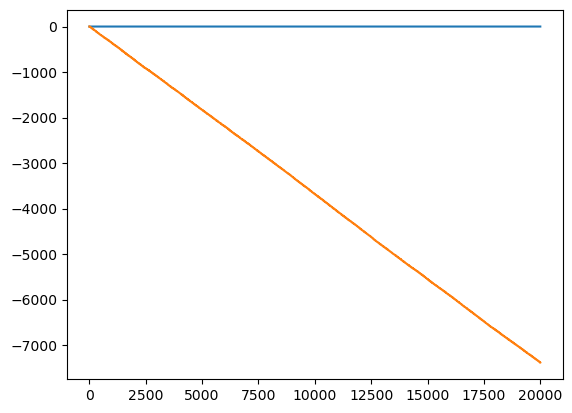

In [26]:
plt.plot(x_hat)